# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine 

### 1.1 Messages

In [2]:
# load messages dataset
messages = pd.read_csv('../data/disaster_messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# Check shape
messages.shape

(26248, 4)

In [4]:
# Check genre
messages['genre'].value_counts()

news      13068
direct    10782
social     2398
Name: genre, dtype: int64

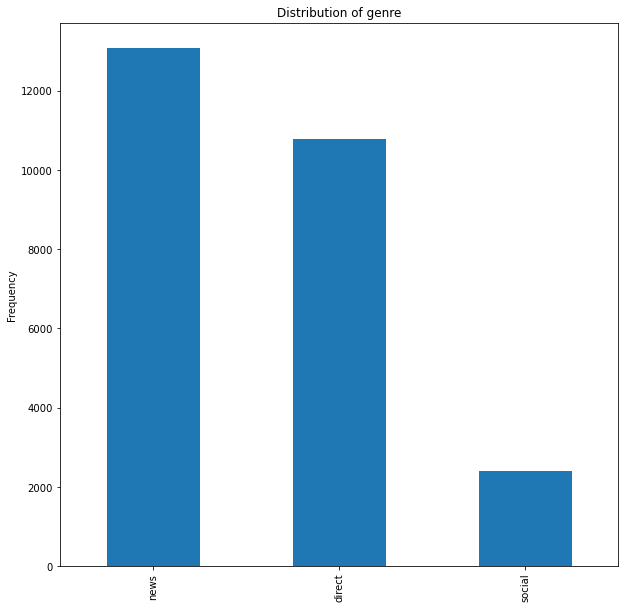

In [5]:
# plot it
messages['genre'].value_counts().plot.bar(
    ylabel = 'Frequency', 
    figsize = (10,10), 
    title = 'Distribution of genre'
);

In [6]:
# take a look at some of the other types:
messages[messages['genre'] == 'news'].head()

,id,message,original,genre
13180,15730,UNICEF is also upgrading solid waste managemen...,NaN,news
13181,15731,China periodically faces spills into rivers th...,NaN,news
13182,15732,"DATO' SRI MOHD NAJIB BIN TUN HAJI ABDUL RAZAK,...",NaN,news
13183,15733,This is a vital step in ensuring respect for h...,NaN,news
13184,15734,The pumping of contaminated water from the bas...,NaN,news


In [7]:
# take a look at some of the other types:
messages[messages['genre'] == 'social'].head()

,id,message,original,genre
9902,11186,My thoughts and prayers go out to all the live...,NaN,social
9903,11188,I m sorry for the poor people in Haiti tonight...,NaN,social
9904,11189,RT selenagomez UNICEF has just announced an em...,NaN,social
9905,11192,lilithia yes 5.2 magnitude earthquake hit mani...,NaN,social
9906,11193,RT TheNewsBlotter RT caribnews On Call Interna...,NaN,social


**Conclusion**: 

`genre` is potentially an interesting feature, but since it is not clear where it comes from and how new data will be tagged to `genre` (for the machine learning model) I will not explore it further.

### 1.2 Categories

In [8]:
# load categories dataset
categories = pd.read_csv('../data/disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [9]:
# Check shape
categories.shape

(26248, 2)

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [10]:
# merge datasets
df = pd.merge(messages, categories, on = 'id', how = 'inner')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [11]:
# check shape:
print("shape: ", df.shape) # messages and categories had 26248 rows

shape:  (26386, 5)


The above suggests that some duplication took place. I will handle this later in the notebook

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [12]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(";", expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [13]:
# select the first row of the categories dataframe
row = categories.iloc[1,:]
print(row)

0                    related-1
1                    request-0
2                      offer-0
3                aid_related-1
4               medical_help-0
5           medical_products-0
6          search_and_rescue-0
7                   security-0
8                   military-0
9                child_alone-0
10                     water-0
11                      food-0
12                   shelter-0
13                  clothing-0
14                     money-0
15            missing_people-0
16                  refugees-0
17                     death-0
18                 other_aid-1
19    infrastructure_related-0
20                 transport-0
21                 buildings-0
22               electricity-0
23                     tools-0
24                 hospitals-0
25                     shops-0
26               aid_centers-0
27      other_infrastructure-0
28           weather_related-1
29                    floods-0
30                     storm-1
31                      fire-0
32      

In [14]:
# use this row to extract a list of new column names for categories.

# a way is apply split on "-" and take just the first column
category_colnames_alt = row.str.split('-',expand = True)[0]
print(category_colnames_alt)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

The above works, but is weak, in case a `-` is used in the name, so let's try with the suggestion:

In [15]:
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x[:-2])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [16]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

1,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [17]:
# check it works:
categories['related'].str[-1]

0        1
1        1
2        1
3        1
4        1
        ..
26381    0
26382    0
26383    1
26384    1
26385    1
Name: related, Length: 26386, dtype: object

In [18]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype('int')
categories.head()

1,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# check no category has a number higher than 1:
categories.max()

1
related                   2
request                   1
offer                     1
aid_related               1
medical_help              1
medical_products          1
search_and_rescue         1
security                  1
military                  1
child_alone               0
water                     1
food                      1
shelter                   1
clothing                  1
money                     1
missing_people            1
refugees                  1
death                     1
other_aid                 1
infrastructure_related    1
transport                 1
buildings                 1
electricity               1
tools                     1
hospitals                 1
shops                     1
aid_centers               1
other_infrastructure      1
weather_related           1
floods                    1
storm                     1
fire                      1
earthquake                1
cold                      1
other_weather             1
direct_report     

let's inspect those rows with related `==2`

In [20]:
categories[categories['related']==2]

1,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
462,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
578,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20465,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20636,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22481,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23537,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df[categories['related']==2]

,id,message,original,genre,categories
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,related-2;request-0;offer-0;aid_related-0;medi...
221,263,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...,direct,related-2;request-0;offer-0;aid_related-0;medi...
307,373,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...,direct,related-2;request-0;offer-0;aid_related-0;medi...
462,565,"Bonsoir, on est a bon repos aprs la compagnie ...",Bonswa nou nan bon repo apri teleko nan wout t...,direct,related-2;request-0;offer-0;aid_related-0;medi...
578,700,URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX ...,r et Salon Furterer. mwen se yon Cosmtologue. ...,direct,related-2;request-0;offer-0;aid_related-0;medi...
...,...,...,...,...,...
20465,23662,transferred to a sanitary landfill site by a,NaN,news,related-2;request-0;offer-0;aid_related-0;medi...
20636,23861,Families also have solar lamps which can be re...,NaN,news,related-2;request-0;offer-0;aid_related-0;medi...
22481,25874,Read the [full blog post](http://www.odi.org.u...,NaN,news,related-2;request-0;offer-0;aid_related-0;medi...
23537,27071,Actualmente e independientemente de la ayuda d...,NaN,news,related-2;request-0;offer-0;aid_related-0;medi...


I do see that some of the messages are not in English. This might turn out to be a problem later for the ML model.

For now  I'll coerce anything greater than 1 into ==1 since it is not clear what a ==2 would mean. Each category should be a dummy


In [22]:
for column in categories:
    categories.loc[categories[column]>1,column]=1
    

In [23]:
# double check no category has a number higher than 1:
categories.max()

1
related                   1
request                   1
offer                     1
aid_related               1
medical_help              1
medical_products          1
search_and_rescue         1
security                  1
military                  1
child_alone               0
water                     1
food                      1
shelter                   1
clothing                  1
money                     1
missing_people            1
refugees                  1
death                     1
other_aid                 1
infrastructure_related    1
transport                 1
buildings                 1
electricity               1
tools                     1
hospitals                 1
shops                     1
aid_centers               1
other_infrastructure      1
weather_related           1
floods                    1
storm                     1
fire                      1
earthquake                1
cold                      1
other_weather             1
direct_report     

In [24]:
# see how many times each category is mentioned:
categories.sum()

1
related                   20246
request                    4513
offer                       121
aid_related               10954
medical_help               2099
medical_products           1319
search_and_rescue           725
security                    471
military                    863
child_alone                   0
water                      1684
food                       2956
shelter                    2342
clothing                    410
money                       606
missing_people              301
refugees                    880
death                      1204
other_aid                  3464
infrastructure_related     1709
transport                  1212
buildings                  1345
electricity                 538
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1155
weather_related            7343
floods                     2177
storm                      2464
fire  

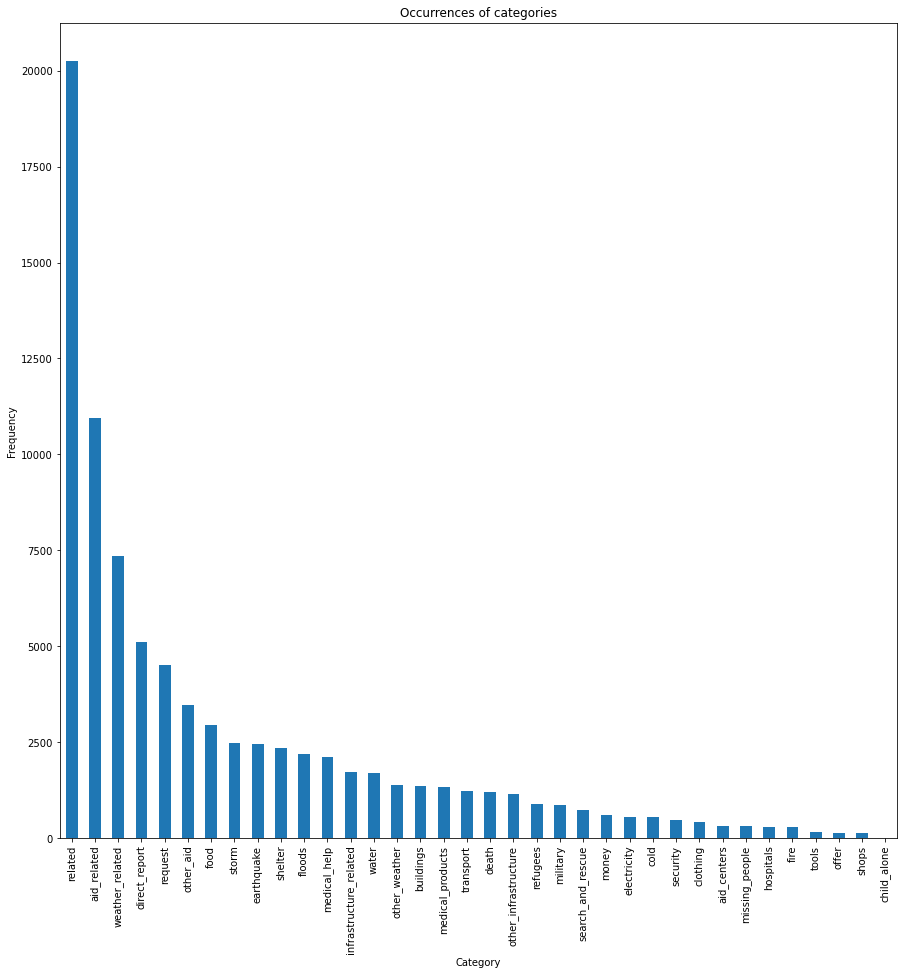

In [25]:
# plot it
categories.sum().sort_values(ascending = False).plot.bar(
    ylabel = 'Frequency', 
    xlabel = 'Category',
    figsize = (15,15), 
    title = 'Occurrences of categories'
);

In [26]:
# check how many categ per msg
categories.sum(axis = 1)

0        1
1        5
2        1
3        8
4        1
        ..
26381    0
26382    0
26383    1
26384    3
26385    1
Length: 26386, dtype: int64

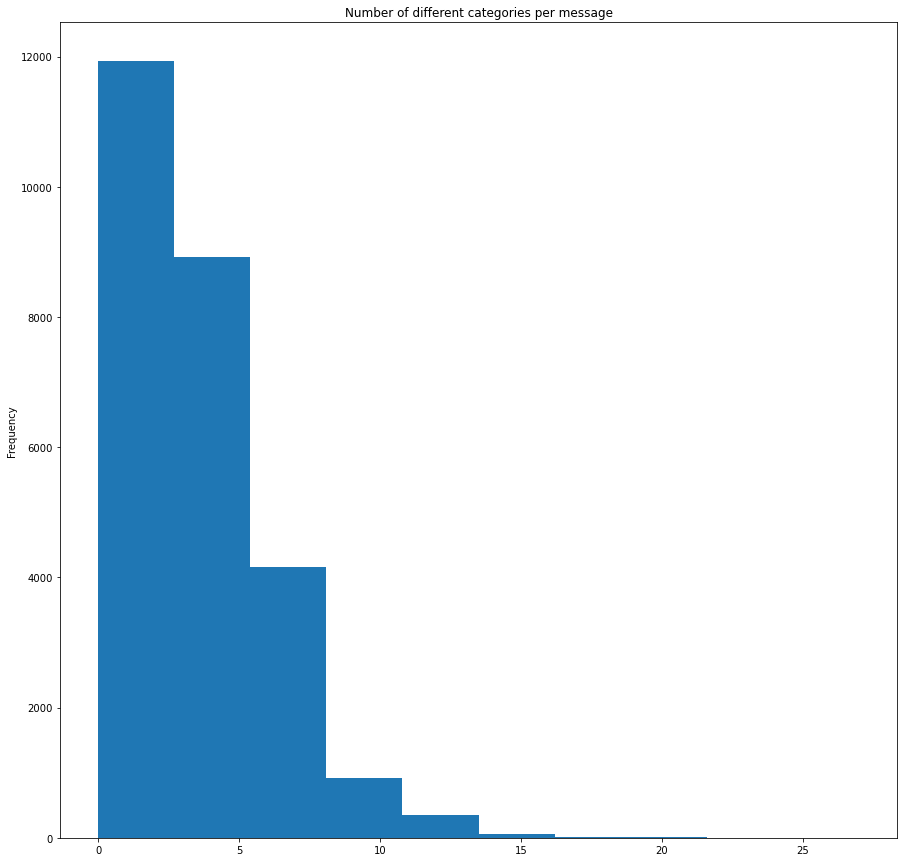

In [27]:
# plot it
categories.sum(axis = 1).plot.hist(
    ylabel = 'Frequency', 
    xlabel = 'Number of different categories',
    figsize = (15,15), 
    title = 'Number of different categories per message',
);

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [28]:
# drop the original categories column from `df`
df.drop('categories', axis = 1, inplace = True)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [29]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [30]:
# check number of duplicates
print("There are ", df.duplicated().sum(), " duplicates")

There are  171  duplicates


In [31]:
# take a look at some:
df[df.duplicated(keep=False)].head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
162,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
163,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
164,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
165,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
657,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [33]:
# check number of duplicates
print("There are ", df.duplicated().sum(), " duplicates")
df.shape

There are  0  duplicates


(26215, 40)

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [34]:
engine = create_engine('sqlite:///disaster_messages.db')
df.to_sql('classified_msgs', engine, index=False, if_exists = 'replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.